## MobileNets

### MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications
https://arxiv.org/pdf/1704.04861.pdf

In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, DepthwiseConv2D, GlobalAvgPool2D, BatchNormalization, ReLU
from tensorflow.keras.utils import plot_model

<img src="images/MobileNet.png" style="width=45px;height=45"/>

In [2]:
# All layers are followed by a batchnorm and ReLU nonlinearity with the exception of the final fully connected layer 
# which has no nonlinearity and feeds into a softmax layer for classification.

def mobilenet(input_shape=(224,224,3), n_classes=1000, include_top=True, weights=None):
    
    def mobilenet_block(x, f, s=1):
        x = DepthwiseConv2D(kernel_size=3, strides=s, padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
    
        x = Conv2D(filters=f, kernel_size=1, strides=1, padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x
    
    
    input = Input(input_shape)

    x = Conv2D(32, 3, strides=2, padding='same')(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = mobilenet_block(x, 64)
    x = mobilenet_block(x, 128, 2)
    x = mobilenet_block(x, 128)

    x = mobilenet_block(x, 256, 2)
    x = mobilenet_block(x, 256)

    x = mobilenet_block(x, 512, 2)
    for _ in range(5):
        x = mobilenet_block(x, 512)

    x = mobilenet_block(x, 1024, 2)
    x = mobilenet_block(x, 1024)
  
    if include_top:
        x = GlobalAvgPool2D()(x)
        x = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=input, outputs=x)

    if weights is not None:
        model.load_weights(weights, by_name=True)
        
    return model

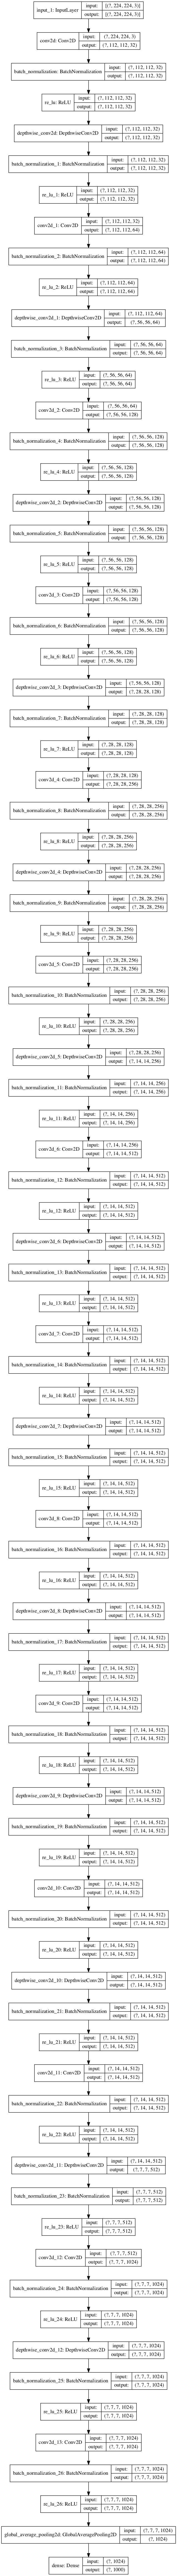

In [3]:
model = mobilenet()
plot_model(model, to_file='MobileNetModel.png', show_shapes=True)

In [4]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu (ReLU)                 (None, 112, 112, 32)      0         
_________________________________________________________________
depthwise_conv2d (DepthwiseC (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 112, 112, 32)      128       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 112, 112, 32)     